In [3]:
import numpy as np
# numpy is used for implementing mathematical operations faster and in an easy way on a python list/array

import matplotlib.pyplot as plt
#Matplotlib is used to create graphs in python

import csv
#This library is required to read the csv(input) data provided

In [4]:
#Setting up input data
#Reading data from csv file
given_x=[]
given_y=[]
with open("data.csv","r") as Data: #opening file in read mode
    reader= csv.reader(Data)
    next(reader)
    for i in reader:
        given_x.append(float(i[0])) #type casting the input data into floating point numbers
        given_y.append(float(i[1]))
        
#Now defining h[n]
#(h[n] --> The filter with which input temperatures are getting convolved)
h=[1/16,1/4,6/16,1/4,1/16]

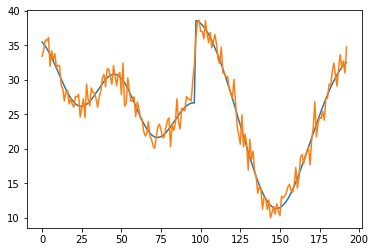

In [5]:
#Exploratory analysis of given data
plt.plot(given_x)
plt.plot(given_y)
#Plot of input x[n] vs y[n]
#DTFT(given_x, given_y)

In [16]:
#Defining discrete time fourier transform function
def DTFT(input_signal,N):
    '''This function calculates the fourier transform of a discrete time signal 
       and gives outputs in discrete frequency domain.'''
    '''Note that the fourier transform of a discrete time signal is a continuous signal in frequency domain.'''
    output_signal=[]
    for i in range(N):
        s=0
        for n in range(0,len(input_signal),1):
            s=s+(input_signal[n]*np.exp(complex(0,(-1*i*2*np.pi*(n)/N))))
            '''Above is the formula of disrete time fourier transform, 
               where we are getting an output of discrete frequencies as we have taken discrete omega's''' 
        output_signal.append(s)
    return output_signal

#Defining inverse discrete time fourier transform function
def Shifted_DTFT(input_signal,N):
    '''This function is used to make fourier transform of h[n] as we want the middle of this array to act as zero-th index
    element while convolution with input signal'''
    output_signal=[]
    for i in range(N):
        s=0
        for n in range(0,len(input_signal),1):
            s=s+(input_signal[n]*np.exp(complex(0,(-1*i*2*np.pi*(n-2)/N))))
        output_signal.append(s)
    return output_signal

#Defining Inverse DTFT          
def Inverse_dtft(input_signal,N):
    '''This function calculates the inverse fourier transform of a discrete signal(initially in frequency domain)
    and gives output in dicrete time domain.'''
    output_signal=[]
    for n in range(0,len(given_y)):
        s=0
        for k in range(0,N):
            s=s+input_signal[k]*np.exp(complex(0,(k*2*np.pi*n)/N))/N
        output_signal.append(s)
    return output_signal

#Defining denoising function using moving average filter
def Denoising(input_signal,number_of_layers):
    '''This function is used for denoising using the convolution of a signal with kernel --> [1/3,1/3,1/3]'''
    '''No padding is used for the two boundary elements of input signal,
    their values are kept same, as padding did very little change in the output denoised signal'''
    i=1
    output_signal=[]
    output_signal.append(input_signal[0])
    while i<len(input_signal)-1:
        output_signal.append((input_signal[i-1]+input_signal[i+1]+input_signal[i])/3)
        i=i+1    
    output_signal.append(input_signal[192])    
    if number_of_layers>0:
        return Denoising(output_signal,number_of_layers-1)
    else:
        return output_signal

#This function is used to remove the low amplitude pluses(noise) from the dtft of input signal
def denoising_amplitude_detection_in_DTFT(y):
    '''The noise has low amplitude but high frequency, thus a filter to detect high amplitudes in 
       dtft of original signal is used'''
    Y=DTFT(y, 193)
    out2= []
    for i in Y:
        var= abs(i)
        if var<50: #Seting threshold(amplitude) value of 50
            out2.append(0)
        else:
            out2.append(i)
    return Inverse_dtft(out2, 193)


#This is the main function used for deblurring 
def Deblurring(signal1,signal2):
    '''This is the main signal which calls the respective fourier transform functions
       and then divides the two fourier transforms'''
    sampling_freq=193
    final_output=[]
    Y_dtft=DTFT(signal1,sampling_freq)
    H_dtft=Shifted_DTFT(signal2,sampling_freq)
    for j in range(sampling_freq):
        if abs(H_dtft[j])<=0.001:  #Setting a threshold value for division, to avoid the final output to shoot up to infinity
            final_output.append(Y_dtft[j]/0.001)
        else:   
            final_output.append(Y_dtft[j]/H_dtft[j])
    return Inverse_dtft(final_output,sampling_freq)

#Function to calculate standard deviation and root mean square error
def RMSE(x,y):
    error=0
    for i in range(len(x)):
        error = error+ (y[i]-x[i])**2
    print('Standard Deviation: ', end=' ')
    print((error**(0.5)/193).real)
    print('Root Mean Square Error: ', end=' ')
    print((error**(0.5)).real)

In [ ]:
#Exploratory analysis of dtft of input signal
plt.plot(DTFT(given_x,1000))

In [ ]:
plt.plot(DTFT(given_y,1000))
#We can clearly see that the noise has low amplitude, but the original signal(x[n]) is having high amplitude pulse
#The only difference in dtft of x,y is at the points having low amplitude

In [ ]:
#Plotting both dtft's over one another
plt.plot(DTFT(given_x,1000))
plt.plot(DTFT(given_y,1000))
plt.ylim(0,1000)
plt.legend(['X[jw]','Y[jw]'])

In [ ]:
#Plotting dtft of h[n]
plt.plot(DTFT2(h,1000))

In [ ]:
#DEBLURRING then DENOISING using the moving average filter method
Y_blur=Deblurring(given_y,h)
x1=Denoising(Y_blur,1)
#plt.ylim(0,50)
plt.plot(x1)
plt.plot(given_x)
RMSE(x, x1)
#The orange signl in the graph is the original one. 
plt.legend(['x_calculated','x_given'])

In [ ]:
#Denoising then deblurring using the moving average filter
y_denoised=Denoising(given_y,1)
x2=Deblurring(yn,h)
plt.plot(x2)
plt.plot(given_x)
RMSE(x,x2)
plt.legend(['x_calculated','x_given'])
plt.show()


Clearly, the moving average filter for denoising is not good enough.
One important point to note is that first denoising then deblurring the signal is creating a better output than deblurring followed by denoising(according to Root mean square error).

# Using another filter for denoising

Standard Deviation:  

NameError: name 'df' is not defined

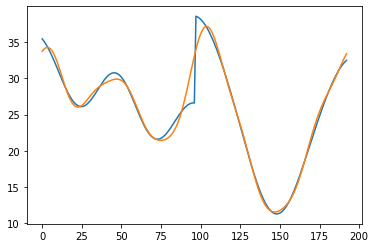

In [14]:
#Denoising then deblurring using amplitude detection in dtft filter for noise removal
y_denoise = denoising_amplitude_detection_in_DTFT(given_y)
plt.plot(given_x)
x11= Deblurring(y_denoise, h)
#plt.plot(y_denoise)
plt.plot(x11)
RMSE(given_x, x11)
plt.legend(['x_given','x_calculated'])          
        

Standard Deviation:  

NameError: name 'df' is not defined

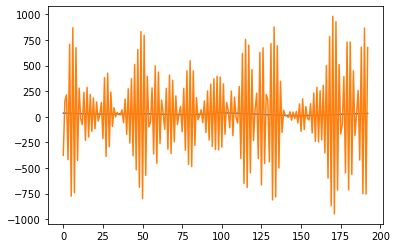

In [15]:
#Deblurring then denoising using amplitude detection in dtft filter for noise removal
temp=Deblurring(given_y, h)
y_denoise2 = denoising_amplitude_detection_in_DTFT(temp)
plt.plot(given_x)
plt.plot(y_denoise2)
RMSE(given_x, y_denoise2)
plt.legend(['x_given','x_calculated']) 

Thus,  after looking at the graphs, denoising then deblurring the signals is producing a very accurate output
But deblurring followed by denoising is having very high errror.

# Conclusion: The input signal should be denoised first, and then deblurred.
Deblurring amplifies the noise in some cases, this deblurring followed by denoising will not work for most of the cases.